<a href="https://colab.research.google.com/github/Parth-107/Stock_diversified_portfoli/blob/main/Stock_diversified_portfoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Parth-107/Stock_diversified_portfoli.git

fatal: destination path 'Stock_diversified_portfoli' already exists and is not an empty directory.


In [3]:
pip install yfinance 

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
#Libraries for Stock market clsutering with k-Mean
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
plt.style.use("fivethirtyeight")

In [5]:
#Downeload the Data
tickers_list = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
		'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
		'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
		'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV',
		'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
		'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK',
		'BAX','BBT','BDX','BRK.B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
		'BHF','BMY','AVGO','BF.B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
		'KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW',
		'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
		'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
		'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
		'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
		'DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
		'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
		'ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST']
data = yf.download(tickers_list,'2013-1-2')['Adj Close']
data.to_csv('stock.csv')


[*********************100%***********************]  192 of 192 completed

15 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- CXO: No data found, symbol may be delisted
- APC: No data found, symbol may be delisted
- CBS: No data found, symbol may be delisted
- ETFC: No data found, symbol may be delisted
- CELG: No data found, symbol may be delisted
- DWDP: No data found, symbol may be delisted
- AGN: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- ALXN: No data found, symbol may be delisted
- CTL: No data found, symbol may be delisted
- BHGE: No data found, symbol may be delisted
- BBT: No data found, symbol may be delisted
- CBG: No data found for this date range, symbol may be delisted
- DPS: No data found for this date range, symbol may be delisted


In [6]:
#Read the data using Panda
df = pd.read_csv('stock.csv')
df.drop(['Date'],axis=1, inplace=True)
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,EVHC,EW,EXC,EXPD,EXPE,EXR,FAST,FB,FFIV,GLW,GOOG,GOOGL,HRB,KMX,KO,LNT,MMM,MO,RE,SCHW,STZ,T,XEC,XOM,XRAY
0,27.652124,13.179524,70.211807,16.960690,24.234327,37.656715,26.966158,58.309402,38.340000,35.736881,22.333019,42.009686,111.042511,36.939999,23.319090,31.587566,8.367408,43.212555,21.751471,NaN,30.407745,2.096377,29.643847,28.328493,42.160000,55.935959,28.400000,19.756771,34.579113,NaN,NaN,10.251339,2.530000,36.483791,130.683746,70.994972,52.487438,67.220337,257.309998,40.287235,...,49.368755,34.245407,55.442436,55.727722,41.749409,55.043045,173.236572,36.540028,30.943998,30.196712,55.619999,114.531891,NaN,43.929901,43.979275,NaN,15.356667,21.403944,36.380405,59.036884,27.239946,18.958603,28.000000,101.110001,10.288085,360.274597,361.987000,13.744608,37.720001,28.479994,16.862904,73.889809,20.335203,92.535217,13.644886,34.443104,20.941431,53.423885,60.387527,38.255436
1,27.751169,12.877849,70.211807,16.746611,24.034222,37.578781,27.992640,58.098320,37.750000,35.160217,22.153856,42.175167,111.936592,36.369999,23.222298,31.565853,8.321767,42.296917,21.200346,NaN,30.157682,2.103270,29.568647,28.200821,40.950001,55.570580,29.170000,20.125473,34.931965,NaN,NaN,10.225361,2.490000,36.313892,129.772766,70.549019,52.399006,65.579163,258.480011,38.805305,...,49.152294,34.491016,56.551094,55.008965,41.948215,55.265568,170.900040,36.693844,31.336634,30.029888,54.700001,114.925880,NaN,43.867634,43.768719,NaN,15.420000,21.576206,36.496044,58.644867,27.461706,19.018057,27.770000,97.250000,10.216084,360.483826,362.197205,13.802297,37.939999,28.479994,16.870377,73.804039,20.347696,93.874947,13.626785,33.645302,20.953402,54.423573,60.278625,38.151581
2,28.299187,13.886583,71.306320,16.280134,23.730602,37.829884,27.824358,58.419155,38.130001,34.534832,22.761452,42.549278,112.577324,36.360001,23.222298,31.515209,8.519542,42.493126,20.934830,NaN,30.257706,2.102504,30.019823,28.129004,40.430000,56.223030,29.309999,20.404242,35.452831,NaN,NaN,10.225361,2.590000,36.738674,132.864212,70.859566,53.026150,65.519615,259.149994,37.749313,...,50.108295,34.982258,56.969120,56.031212,42.108788,55.986542,173.437973,36.681023,32.058243,30.060215,55.000198,115.049530,NaN,44.163353,43.761921,NaN,15.441667,21.726936,37.198742,60.166283,27.594761,19.041842,28.760000,97.529999,10.184084,367.607117,369.354340,13.881622,37.860001,28.525444,16.967501,74.349792,20.335203,93.849991,13.988724,33.700314,21.079044,55.505810,60.557720,38.482018
3,28.094501,13.990281,71.064140,16.184374,23.778898,37.951107,28.051531,58.165863,37.939999,34.640423,21.818901,42.383808,115.043449,36.090000,22.931927,31.384926,8.253306,43.128471,20.854374,NaN,29.949284,2.108632,29.384844,28.551926,40.770000,56.501385,28.940001,20.840380,35.066391,NaN,NaN,10.104145,2.670000,36.427158,133.058014,70.501244,52.463329,65.443092,268.459991,35.690575,...,49.945961,34.349609,56.342087,56.015236,41.825871,56.071083,176.274109,36.956631,32.090080,29.734127,54.509800,115.242638,NaN,43.385151,43.021584,NaN,15.750000,21.439835,36.798473,60.119633,27.646511,18.954643,29.420000,96.239998,10.104083,366.003143,367.742737,13.838351,37.209999,28.252762,16.844227,74.443306,20.285206,92.293877,13.816803,33.388535,21.174774,56.138638,59.856564,38.614197
4,27.870016,14.291959,69.901886,16.227928,23.261370,37.899147,28.059940,58.503593,38.139999,34.283051,22.075956,42.628410,115.639503,36.299999,23.036165,31.225740,8.253306,41.645805,21.095747,NaN,29.715904,2.100973,29.443325,28.256681,40.139999,55.474892,28.250000,20.683006,35.141991,NaN,NaN,9.965615,2.670000,36.379955,132.912659,70.198578,51.442204,65.706703,266.380005,36.737698,...,50.000065,34.297497,57.014557,55.512096,41.451183,55.247753,173.397720,37.091240,31.135014,29.574879,53.980000,115.636665,NaN,42.817059,42.681961,NaN,15.

In [7]:
#Calculate the annual Mean return and variance
daily_return =  df.pct_change()
annual_mean_returns = daily_return.mean() * 252
annual_return_variance = daily_return.var() * 252

In [8]:
#Create the New dataframe
df2 = pd.DataFrame(df.columns, columns=['Stock_Symbols'])
df2['Variances'] = annual_return_variance.values
df2['Returns'] = annual_mean_returns.values
#Remove the NAnN rows
df2 = df2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#Show the new Data
df2[:20]

,Stock_Symbols,Variances,Returns
0,A,0.059846,0.229622
1,AAL,0.246825,0.165613
2,AAP,0.100447,0.184929
3,AAPL,0.079511,0.293291
4,ABBV,0.076906,0.214676
5,ABC,0.069847,0.166458
6,ABT,0.052959,0.199449
7,ACN,0.051151,0.231543
8,ADBE,0.085270,0.365205
9,ADI,0.084509,0.227729


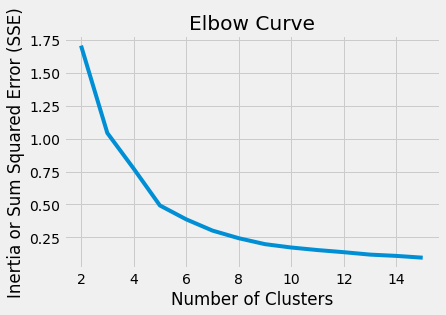

In [9]:
X = df2[['Returns','Variances']].values
inertia_list = []

for i in range(2,16):
  #create and train the model
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

#Plot the data
plt.plot(range(2,16), inertia_list)
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia or Sum Squared Error (SSE)")
plt.show()

In [10]:
#Get and show the labels 
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_
labels

array([2, 3, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0,
       2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 3, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 3, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 3, 0, 3, 2, 3, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 2, 2, 0, 0, 0,
       3, 3, 2, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0,
       0], dtype=int32)

In [11]:
#Add the clusters into our Datasets
df2["Cluster_Labels"] = labels
df2

,Stock_Symbols,Variances,Returns,Cluster_Labels
0,A,0.059846,0.229622,2
1,AAL,0.246825,0.165613,3
2,AAP,0.100447,0.184929,0
3,AAPL,0.079511,0.293291,2
4,ABBV,0.076906,0.214676,2
...,...,...,...,...
187,STZ,0.085467,0.257370,2
188,T,0.040215,0.038768,0
189,XEC,0.218786,0.166444,3
190,XOM,0.065900,0.035003,0


Text(0, 0.5, 'Variances')

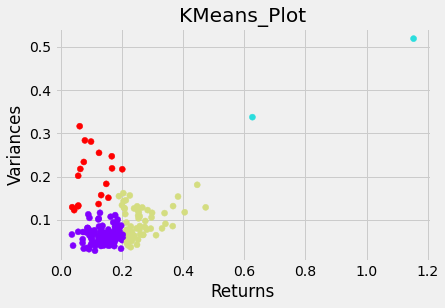

In [12]:
plt.scatter(X[:,0], X[:,1], c= labels, cmap='rainbow')
plt.title("KMeans_Plot")
plt.xlabel("Returns")
plt.ylabel("Variances")

In [13]:
def stock_portfolio():
  for i in range(0,4):
    symbol = df2[df2["Cluster_Labels"] == i].head(1)
    print(symbol[['Stock_Symbols', 'Cluster_Labels']])

stock_portfolio()

  Stock_Symbols  Cluster_Labels
2           AAP               0
   Stock_Symbols  Cluster_Labels
32           AMD               1
  Stock_Symbols  Cluster_Labels
0             A               2
  Stock_Symbols  Cluster_Labels
1           AAL               3
